In [8]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers.experimental import RandomFourierFeatures
from keras.utils import np_utils
%matplotlib inline

# Load Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = np_utils.to_categorical(train_labels) 
test_labels = np_utils.to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=3072, activation='relu'))

# Softmax CNN with Dropout
model1 = models.clone_model(model)
model1.add(layers.Dropout(rate=.2))
model1.add(layers.Dense(units=10, activation='softmax'))
# Compile the model.
model1.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Softmax CNN without Droupout
model2 = models.clone_model(model)
model2.add(layers.Dense(units=10))
# Compile the model.
model2.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# CNN + SVM with Dropout
model3 = models.clone_model(model)
model3.add(layers.Dropout(rate=.2))
model3.add(RandomFourierFeatures(
    output_dim=3072, scale=10.0, kernel_initializer="gaussian"
))
model3.add(layers.Dense(units=10))
# Compile the model.
model3.compile(
    'adam',
    loss=keras.losses.hinge,
    metrics=['accuracy'],
)

    

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6979 - accuracy: 0.3781 - val_loss: 1.3418 - val_accuracy: 0.5307
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2034 - accuracy: 0.5778 - val_loss: 1.1031 - val_accuracy: 0.6096
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9877 - accuracy: 0.6552 - val_loss: 1.0347 - val_accuracy: 0.6451
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8226 - accuracy: 0.7126 - val_loss: 1.0304 - val_accuracy: 0.6516
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6747 - accuracy: 0.7617 - val_loss: 1.0048 - val_accuracy: 0.6767
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5396 - accuracy: 0.8109 - val_loss: 1.0544 - val_accuracy: 0.6616
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4222 - accuracy: 0.8537 - val_loss: 1.1493 - val_accuracy:

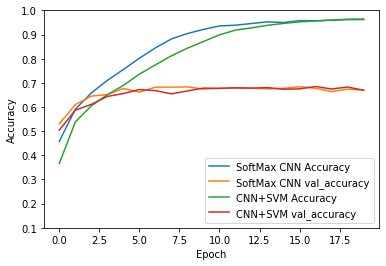

In [9]:
# Experiment1: Softmax CNN and CNN + SVM
history1 = model1.fit(train_images, train_labels, epochs=20,
              validation_data=(test_images, test_labels))
history3 = model3.fit(train_images, train_labels, epochs=20,
              validation_data=(test_images, test_labels))

plt.plot(history1.history['accuracy'], label='SoftMax CNN Accuracy')
plt.plot(history1.history['val_accuracy'], label='SoftMax CNN val_accuracy')
plt.plot(history3.history['accuracy'], label='CNN+SVM Accuracy')
plt.plot(history3.history['val_accuracy'], label='CNN+SVM val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
plt.clf()

<Figure size 432x288 with 0 Axes>

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1196 - accuracy: 0.9636 - val_loss: 2.4663 - val_accuracy: 0.6736
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1227 - accuracy: 0.9634 - val_loss: 2.4799 - val_accuracy: 0.6738
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1212 - accuracy: 0.9653 - val_loss: 2.5999 - val_accuracy: 0.6656
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1112 - accuracy: 0.9674 - val_loss: 2.7216 - val_accuracy: 0.6583
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1101 - accuracy: 0.9691 - val_loss: 2.7865 - val_accuracy: 0.6621
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1222 - accuracy: 0.9662 - val_loss: 2.6975 - val_accuracy: 0.6707
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1039 - accuracy: 0.9708 - val_loss: 2.7564 - val_accuracy:

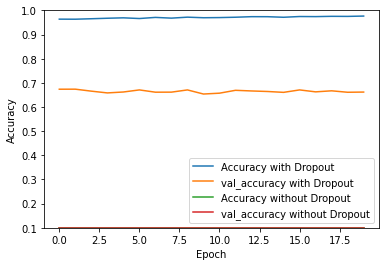

In [11]:
# Experiement2: Softmax CNN with Dropout and without Dropout
history1 = model1.fit(train_images, train_labels, epochs=20,
          validation_data=(test_images, test_labels))
history2 = model2.fit(train_images, train_labels, epochs=20,
          validation_data=(test_images, test_labels))

plt.plot(history1.history['accuracy'], label='Accuracy with Dropout')
plt.plot(history1.history['val_accuracy'], label='val_accuracy with Dropout')
plt.plot(history2.history['accuracy'], label='Accuracy without Dropout')
plt.plot(history2.history['val_accuracy'], label='val_accuracy without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss_1, test_acc_1 = model1.evaluate(test_images, test_labels, verbose=2)
test_loss_2, test_acc_2 = model2.evaluate(test_images, test_labels, verbose=2)
print("SoftMax CNN with Dropout Test Loss : %d Test Acccuracy: %d", test_loss_1, test_acc_1)
print("SoftMax CNN without Dropout Test Loss : %d Test Acccuracy: %d", test_loss_2, test_acc_2)
plt.show()

In [12]:
test_loss_3, test_acc_3 = model3.evaluate(test_images, test_labels, verbose=2)
print("SVM CNN with Dropout Test Loss : %d Test Acccuracy: %d", test_loss_3, test_acc_3)


313/313 - 1s - loss: 0.3278 - accuracy: 0.6692
SVM CNN with Dropout Test Loss : %d Test Acccuracy: %d 0.32777705788612366 0.6692000031471252
